In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [14]:

def import_data(file_name):
    #EH:  Create DataFrame from csv
    sector_data_df = pd.read_csv(
    Path('Data_Prep_Output/'+file_name+'.csv'))    
    #EH: create binary column for roi positive
    sector_data_df['roi_positive'] = sector_data_df['q_roi'] >0      
    #EH:  Drop unnamed, currency, ticker, sector columns from the DataFrame
    sector_data_df = sector_data_df.drop(columns=['Unnamed: 0','reportedCurrency','ticker','Sector','close','q_roi'],axis=1)    
    #EH: rename date_x
    sector_data_df=sector_data_df.rename(columns={'date_x':'date'})
    #EH: change date to datetime format
    sector_data_df['date']=pd.to_datetime(sector_data_df['date']    

    
    return sector_data_df


In [15]:
def data_prep(dataframe):
    #Isolating the categorical variables
    categorical_variables = list(dataframe.dtypes[dataframe.dtypes == "datetime64[ns]"].index)

    #Calling an instance of OneHotEncoder
    enc = OneHotEncoder(sparse=False)
    
    #Encoding the categorical variables
    encoded_data = enc.fit_transform(dataframe[categorical_variables])

    #Creating a new dataframe of the categorical variables
    encoded_df = pd.DataFrame(encoded_data,columns = enc.get_feature_names_out(categorical_variables))

    #Combining the newly encoded categorical variables with the original dataframe again
    encoded_df = pd.concat([dataframe.drop(columns = categorical_variables),encoded_df], axis=1)
    
    return encoded_df

In [16]:
def data_separation(df, dependent_variable):
    #Separating and scaling the dependent and independent variables   
    y = df[dependent_variable]
    X = df.drop([dependent_variable],axis=1)    
    #Splitting the training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)    
    #Scaling the data
    scaler = StandardScaler()
    # Fit the scaler to the features training dataset
    X_scaler = scaler.fit(X_train)
    # Fit the scaler to the features training dataset
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)    
    return y_train, y_test,  X_train_scaled, X_test_scaled

In [17]:

def log_reg(y_train, y_test,  X_train_scaled, X_test_scaled):
    #Create an instance of the logistic regression model
    lr_model = LogisticRegression()

    # Fit the model
    lr_model.fit(X_train_scaled, y_train)

    # Generate predictions from the model we just fit
    training_predictions = lr_model.predict(X_train_scaled)
   
    # Testing the model
    testing_predictions = lr_model.predict(X_test_scaled)
    
    #evaluation report
    evaluate=classification_report(y_train,training_predictions)
    score= accuracy_score(y_test, testing_predictions)
    return evaluate, score

In [18]:
#read directory filenames

file_list=[]
for path, subdirs,files in os.walk("Data_Prep_Output"):
    for name in files:
        if name[-4:]=='.csv':
            file_list.append(name[:-4])
file_list=file_list[:-2]
file_list
    

['Consumer Non-Durables',
 'Electronic Technology',
 'Finance',
 'Health Technology',
 'Process Industries',
 'Producer Manufacturing',
 'Technology Services',
 'Utilities']

Logistic Regression Model-  Consumer Non-Durables  Classification report
              precision    recall  f1-score   support

       False       0.84      0.54      0.66        94
        True       0.82      0.95      0.88       204

    accuracy                           0.82       298
   macro avg       0.83      0.75      0.77       298
weighted avg       0.82      0.82      0.81       298

Logistic Regression Model-  Consumer Non-Durables  Accuracy score


0.73

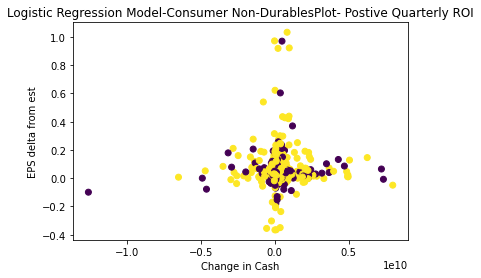

Logistic Regression Model-  Electronic Technology  Classification report
              precision    recall  f1-score   support

       False       0.82      0.44      0.58       151
        True       0.82      0.96      0.88       393

    accuracy                           0.82       544
   macro avg       0.82      0.70      0.73       544
weighted avg       0.82      0.82      0.80       544

Logistic Regression Model-  Electronic Technology  Accuracy score


0.7362637362637363

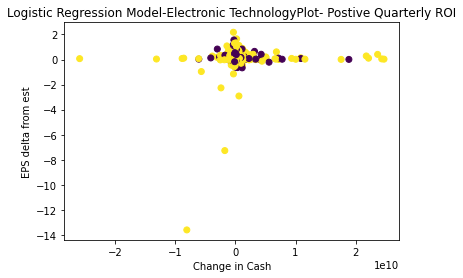

Logistic Regression Model-  Finance  Classification report
              precision    recall  f1-score   support

       False       0.86      0.39      0.54       382
        True       0.79      0.97      0.87       910

    accuracy                           0.80      1292
   macro avg       0.82      0.68      0.70      1292
weighted avg       0.81      0.80      0.77      1292

Logistic Regression Model-  Finance  Accuracy score


0.7888631090487239

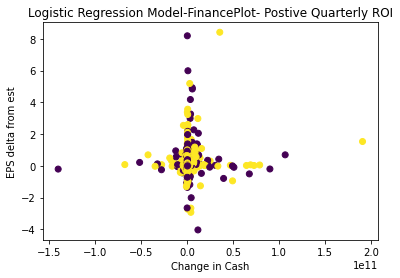

Logistic Regression Model-  Health Technology  Classification report
              precision    recall  f1-score   support

       False       0.78      0.46      0.58       169
        True       0.81      0.95      0.87       410

    accuracy                           0.80       579
   macro avg       0.80      0.70      0.73       579
weighted avg       0.80      0.80      0.79       579

Logistic Regression Model-  Health Technology  Accuracy score


0.8082901554404145

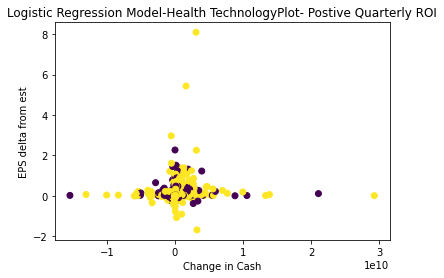

Logistic Regression Model-  Process Industries  Classification report
              precision    recall  f1-score   support

       False       0.84      0.55      0.67        92
        True       0.84      0.96      0.90       228

    accuracy                           0.84       320
   macro avg       0.84      0.76      0.78       320
weighted avg       0.84      0.84      0.83       320

Logistic Regression Model-  Process Industries  Accuracy score


0.7102803738317757

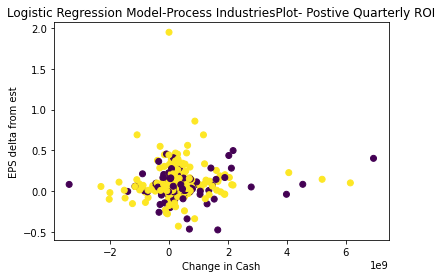

Logistic Regression Model-  Producer Manufacturing  Classification report
              precision    recall  f1-score   support

       False       0.86      0.47      0.61       120
        True       0.83      0.97      0.90       321

    accuracy                           0.83       441
   macro avg       0.85      0.72      0.75       441
weighted avg       0.84      0.83      0.82       441

Logistic Regression Model-  Producer Manufacturing  Accuracy score


0.7210884353741497

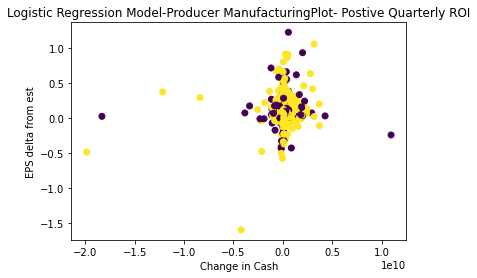

Logistic Regression Model-  Technology Services  Classification report
              precision    recall  f1-score   support

       False       0.92      0.39      0.55       152
        True       0.79      0.99      0.88       365

    accuracy                           0.81       517
   macro avg       0.86      0.69      0.71       517
weighted avg       0.83      0.81      0.78       517

Logistic Regression Model-  Technology Services  Accuracy score


0.7572254335260116

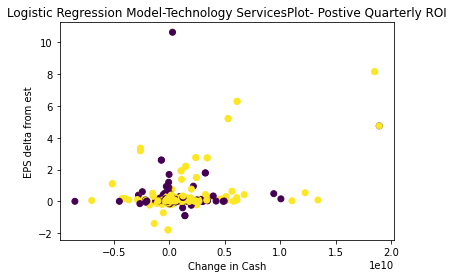

Logistic Regression Model-  Utilities  Classification report
              precision    recall  f1-score   support

       False       0.80      0.57      0.67       115
        True       0.85      0.95      0.90       298

    accuracy                           0.84       413
   macro avg       0.83      0.76      0.78       413
weighted avg       0.84      0.84      0.83       413

Logistic Regression Model-  Utilities  Accuracy score


0.7028985507246377

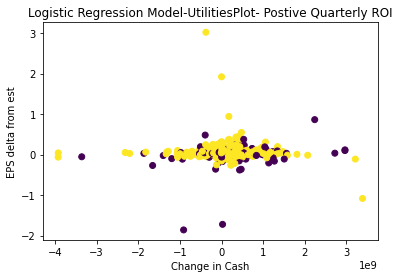

In [19]:
#evaluation, score, plot

for sector_file in file_list:
    sector_data=import_data(sector_file)
    encoded_df=data_prep(sector_data)
    y_train, y_test,  X_train_scaled, X_test_scaled=data_separation(encoded_df,'roi_positive')
    print('=============================' *6)
   
    evaluate, score=log_reg(y_train, y_test,  X_train_scaled, X_test_scaled)
    print(f'Logistic Regression Model-  \033[1m{sector_file} \033[0m Classification report')
    print(evaluate)
    
    print(f'Logistic Regression Model-  \033[1m{sector_file} \033[0m Accuracy score')
    display(score)
    
    #Scatter plot
    plt.scatter(
        # One feature on the x-axis
        x=sector_data['changeInCashAndCashEquivalents'],

        y=sector_data['surprise'],

        c=sector_data['roi_positive'])
    plt.xlabel('Change in Cash')
    plt.ylabel('EPS delta from est')
    plt.title(f'Logistic Regression Model-{sector_file}Plot- Postive Quarterly ROI')
    
    plt.show()


